In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import healpy as hp

In [17]:
av = np.load('I_355_tgextmap.npz')
level = 8
av.files

['HPId', 'HPlevel', 'A0', 'e_A0', 'Ntracers']

In [18]:
mask = av['HPlevel'] == level

In [19]:
av['HPId'][mask]

array([ 17168,   1712,  17169, ..., 659565, 659566, 659567], dtype=int32)

In [20]:
NSIDE = 2**level
NPIX = hp.nside2npix(NSIDE)
print(NPIX)
print(hp.nside2resol(NSIDE, arcmin=True))
m = np.zeros(NPIX)

786432
13.741945647269624


In [21]:
m[av['HPId'][mask]] = av['A0'][mask]

In [22]:
m

array([0.2349, 0.    , 0.    , ..., 0.3744, 0.0775, 0.0944])

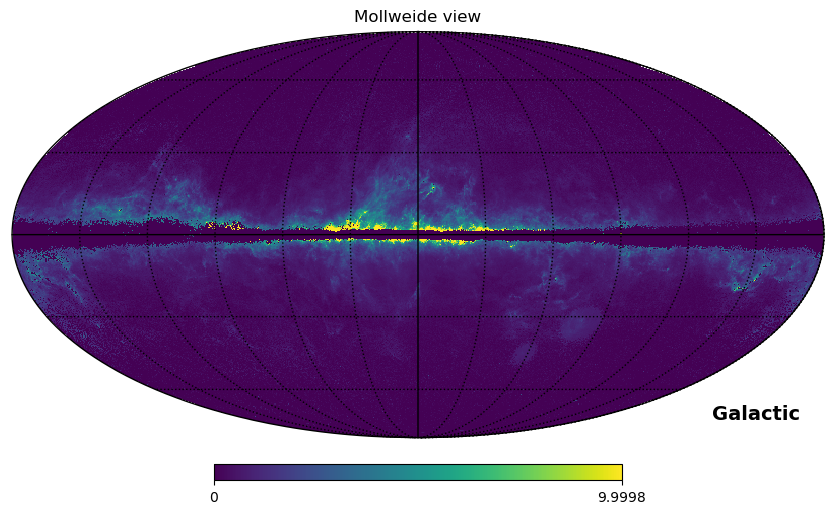

In [31]:
hp.mollview(m, nest=True, coord=('C', 'G'))#, rot=(-30.9053218046004, 133.8437332770432))
hp.graticule()